In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [3]:
data = pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
# FINDING NULL VALUES
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2. Reset the index as "name".

In [6]:
data = pd.read_csv('employee.csv',index_col = 'name')
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
data[data['department'].isin(['Sales', 'Finance']) ]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [9]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
data[(data['performance_score']<700)&(data['performance_score']>500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [11]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Null values present in age, income and gender


In [13]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

Filling the missing values Considering the columns age and income(having same data types)

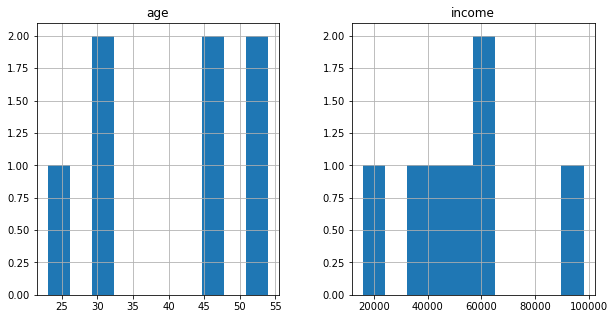

In [16]:
import matplotlib.pyplot as plt
fgraph= data[['age','income']]
fgraph.hist(figsize=(10,5))
plt.show()

In [17]:
new_data=data
for i in['age','income']:
    new_data[i]=new_data[i].fillna(new_data[i].median())
new_data    
    

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Consider the column gender

In [18]:
data['gender'] = data['gender'].fillna(data['gender'].mode().loc[0])
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [19]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Analysis of Performance_Score')

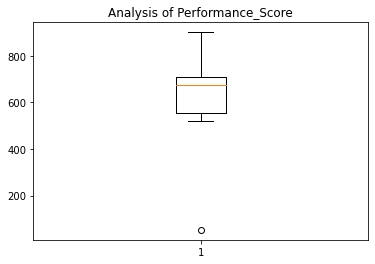

In [20]:
plt.boxplot(data['performance_score'])
plt.title('Analysis of Performance_Score')

In [21]:
import numpy as np
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
LOWER_LIMIT=Q1-1.5*IQR
UPPER_LIMIT=Q3+1.5*IQR
print('IQR=',IQR)
print('LOWER_LIMIT=',LOWER_LIMIT)
print('UPPER_LIMIT=',UPPER_LIMIT)

IQR= 155.0
LOWER_LIMIT= 323.5
UPPER_LIMIT= 943.5


In [22]:
outlier=[]
for x in data['performance_score']:
    if ((x>UPPER_LIMIT) or (x<LOWER_LIMIT)):
        outlier.append(x)
outlier   

[53]

Finding the index of the outlier

In [23]:
index1=data['performance_score']<LOWER_LIMIT
data.loc[index1].index

Index(['James Authur'], dtype='object', name='name')

In [24]:
data.drop(['James Authur'],inplace=True)

Text(0.5, 1.0, 'Analysis of Performance_Score')

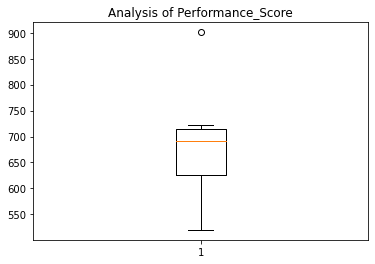

In [25]:
plt.boxplot(data['performance_score'])
plt.title('Analysis of Performance_Score')

# 9. Check the gender column and do Dummy encoding.

In [26]:
data = pd.read_csv('employee.csv')
data1 = pd.get_dummies(data, columns=['gender'])
data1

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,NaN,Operations,G3,723,0,0
1,S Kumar,NaN,16000.0,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
5,Satyam Sharma,NaN,62000.0,Sales,G3,649,0,0
6,James Authur,54.0,NaN,Operations,G3,53,1,0
7,Josh Wills,54.0,52000.0,Finance,G3,901,1,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score

In [27]:
data['performance_score'].describe()

count      9.000000
mean     610.666667
std      235.671912
min       53.000000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [28]:
df = pd.read_csv('employee.csv')
df.head()
df.columns
X = df[['performance_score']]
#standardisation=preprocessing.scalar()
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X = pd.DataFrame(X)

In [29]:
X.describe()

,0
count,9.000000e+00
mean,2.035409e-16
std,1.060660e+00
min,-2.509823e+00
25%,-2.460317e-01
50%,2.850367e-01
75%,4.515581e-01
max,1.306668e+00
